# Дипломная работа

Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты


1. Загрузите файл HR.csv в pandas dataframe

In [1]:
import pandas as pd
HR = pd.read_csv('HR.csv')
HR

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).


In [2]:
stat = HR.describe().transpose() # рассчет основных статистик
stat

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [3]:
# дополнительные расчеты медианы и моды



# расчет медианы
med_table = pd.DataFrame()
for columnsmed in HR.columns:
    try:
        med = HR[columnsmed].median()
        med_table[columnsmed] = med,
    except: 
        print('Невозможно посчитать медиану для значений столбца: ', columnsmed)
        
    

med_table = med_table.transpose()

med_table

Невозможно посчитать медиану для значений столбца:  department
Невозможно посчитать медиану для значений столбца:  salary


,0
satisfaction_level,0.64
last_evaluation,0.72
number_project,4.00
average_montly_hours,200.00
time_spend_company,3.00
Work_accident,0.00
left,0.00
promotion_last_5years,0.00


In [4]:
# # расчет моды
mod_table = pd.DataFrame()
for columnsmod in HR.columns:
    mode = HR[columnsmod].mode()
    mod_table[columnsmod] = mode
mod_table.transpose()

,0
satisfaction_level,0.1
last_evaluation,0.55
number_project,4
average_montly_hours,135
time_spend_company,3
Work_accident,0
left,0
promotion_last_5years,0
department,sales
salary,low


3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
Определите две самые скоррелированные и две наименее скоррелированные переменные.


In [5]:
HR_corr = HR[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]
HR_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3
...,...,...,...,...,...
14994,0.40,0.57,2,151,3
14995,0.37,0.48,2,160,3
14996,0.37,0.53,2,143,3
14997,0.11,0.96,6,280,4


In [6]:
HR_corr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


Среди количественных показателей были отобранны следующие: 
satisfaction_level - Уровень удовлетворенности работой  
Last_evaluation - Время с момента последней оценки в годах  
number_projects - Количество проектов, выполненных за время работы  
average_monthly_hours - Среднее количество часов на рабочем месте в месяц  
time_spend_company - Стаж работы в компании в годах
Остальные данные являются дискретными

Наибольший коэффциент корреляции наблюдается между Средним количество часов на рабочем месте за месяц и количество проектов (0,41), наименьший коэффциент корреляции наблюдается между Уровнем удовлетворенности работой и количеством часов на рабочем месте (-0,02).

4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [7]:
HR[['salary', 'department']].groupby('department').count()

,salary
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


5. Показать распределение сотрудников по зарплатам.

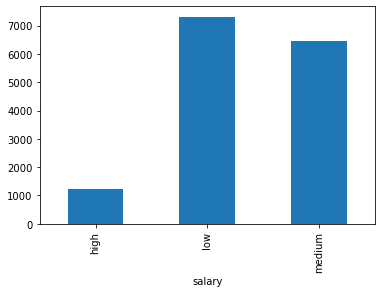

In [8]:
HR[['salary', 'department']].groupby('salary').count().plot(kind="bar", legend = False)

6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

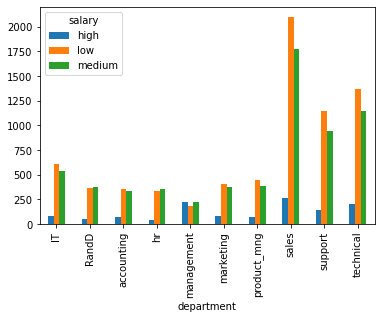

In [9]:
HR_dep_sel = HR.pivot_table(values= 'satisfaction_level', index='department', columns= 'salary', aggfunc='count')
HR_dep_sel.plot(kind="bar")

In [10]:
HR_dep_sel

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом


Нулевая гипотеза = сотрудники с выским окладом проводят одинаковое количество времени на работе. 
Уровень значимости 5%.
Считаю данные выборки зависимыми, так как на количество часов на работе и уровень запралаты может влиять должность сотрудника. В связи с этим гипотеза будет проверятся с помощью Т-Теста Стьюдента 

In [11]:
# подготовка данных для теста
employee_low = HR[HR['salary'] == 'low'].average_montly_hours
employee_higt = HR[HR['salary'] == 'high'].average_montly_hours

In [12]:
from scipy import stats as st
alpha = 0.05
result = st.ttest_ind(employee_higt, employee_low, equal_var=False)
print(result)
if result.pvalue > alpha:
    print('не отвергаем нулевую гипотезу, скорей всего количество часов не зависит от уровня зарплаты')
elif result.statistic < 0:
    print('отвергаем нулевую гипотезу, сотрудники с низкой зарплатой работают больше')
else: 
    print('отвергаем нулевую гипотезу, сотрудники с высокой запралатой работают больше')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
не отвергаем нулевую гипотезу, скорей всего количество часов не зависит от уровня зарплаты


In [13]:
employee_low.mean()

200.9965828321487

In [14]:
employee_higt.mean()

199.86742118027485

8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):  
● Доля сотрудников с повышением за последние 5 лет  
● Средняя степень удовлетворенности  
● Среднее количество проектов  

In [15]:
employee_left = HR[HR['left'] == 1]
employee_current = HR[HR['left'] == 0]


In [16]:
# Доля сотрудников с повышением за последние 5 лет

left_share = len(employee_left[employee_left['promotion_last_5years'] == 1])/len(employee_left) * 100
current_share = len(employee_current[employee_current['promotion_last_5years'] == 1])/len(employee_current) * 100

print('Доля сотрудников с повышением среди уволившихся сотрудников составляет ', round(left_share, 2),'%')
print('Доля сотрудников с повышением среди не уволившихся сотрудников составляет ', round(current_share, 2), '%') 

Доля сотрудников с повышением среди уволившихся сотрудников составляет  0.53 %
Доля сотрудников с повышением среди не уволившихся сотрудников составляет  2.63 %


In [17]:
#Средняя степень удовлетворенности
print('Средняя степень удовлетворенности среди уволившихся сотрудников осоставляет ', employee_left['satisfaction_level'].mean())
print('Средняя степень удовлетворенности среди не уволившихся сотрудников осоставляет ', employee_current['satisfaction_level'].mean())


Средняя степень удовлетворенности среди уволившихся сотрудников осоставляет  0.44009801176140917
Средняя степень удовлетворенности среди не уволившихся сотрудников осоставляет  0.666809590479516


In [18]:
#Среднее количество проектов
print('Среднее количество проектов среди уволившихся сотрудников осоставляет ', employee_left['number_project'].mean())
print('Среднее количество проектов среди не уволившихся сотрудников осоставляет ', employee_current['number_project'].mean())


Среднее количество проектов среди уволившихся сотрудников осоставляет  3.8555026603192384
Среднее количество проектов среди не уволившихся сотрудников осоставляет  3.786664333216661


9. Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)  
Оценить качество модели на тестовой выборки

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = HR[['satisfaction_level', 
        'last_evaluation', 
        'number_project',
        'average_montly_hours',
        'time_spend_company',
        'Work_accident',
        'promotion_last_5years']]
y = HR['left']

X_train, X_test, y_train, y_test = train_test_split(X, y)
lda = LinearDiscriminantAnalysis()
# обучаем данные
lda.fit(X_train, y_train)
# делаем прогноз на тестовой выборке
y_pred = lda.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2635,  238],
       [ 655,  222]], dtype=int64)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2873
           1       0.48      0.25      0.33       877

    accuracy                           0.76      3750
   macro avg       0.64      0.59      0.59      3750
weighted avg       0.73      0.76      0.73      3750



Точность модели 75%. Модель невернно предсказала 236 сотрудников, которые не уволятся и 691, которые уволятся (927) из 3750 значений. 